In [42]:
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [24]:
with open('./chat.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

In [25]:
content[:10]

['[8/3/16, 10:58:34 AM] Akshay: Tomorrow morning?',
 '[8/3/16, 10:58:57 AM] Suyash: Shall Sunil also be called?',
 '[8/3/16, 10:59:05 AM] Akshay: Ok',
 '[8/3/16, 10:59:15 AM] Suyash: Wait ask Udit',
 '[8/3/16, 10:59:27 AM] Suyash: Depends on how much space as well',
 '[8/3/16, 10:59:39 AM] Akshay: Yes udit pls give permission',
 '[8/3/16, 10:59:56 AM] Akshay: Also, rahul, most of us live closer to udit... So it may be better if you come here',
 '[8/3/16, 11:10:43 AM] Rahul: Ok',
 '[8/3/16, 11:11:03 AM] Akshay: Ok now let udit respond',
 '[8/3/16, 11:23:51 AM] Udit: Hey']

In [26]:
dateStrings = []
dates = []
names = []
for line in content:
    if len(line) == 0 or line[0] != '[':
        continue
    date = line.split(',')[0][1:]
    date = date.split('/')[0] + '/' + date.split('/')[1] + '/20' + date[-2:]
    dateStrings.append(date)
    dates.append(datetime.strptime(date, '%m/%d/%Y'))
    names.append((line.split(':')[2]).split(' ')[2])

In [27]:
df = pd.DataFrame(
    {'Date': dates,
     'Sender': names,
    })
df.head()

,Date,Sender
0,2016-08-03,Akshay
1,2016-08-03,Suyash
2,2016-08-03,Akshay
3,2016-08-03,Suyash
4,2016-08-03,Suyash


In [35]:
nf = df.groupby('Date', as_index=False).count()

In [63]:
nf.head()

,Date,Sender
0,2016-08-03,59
1,2016-08-04,4
2,2016-08-05,10
3,2016-08-06,44
4,2016-08-07,109


<function matplotlib.pyplot.show>

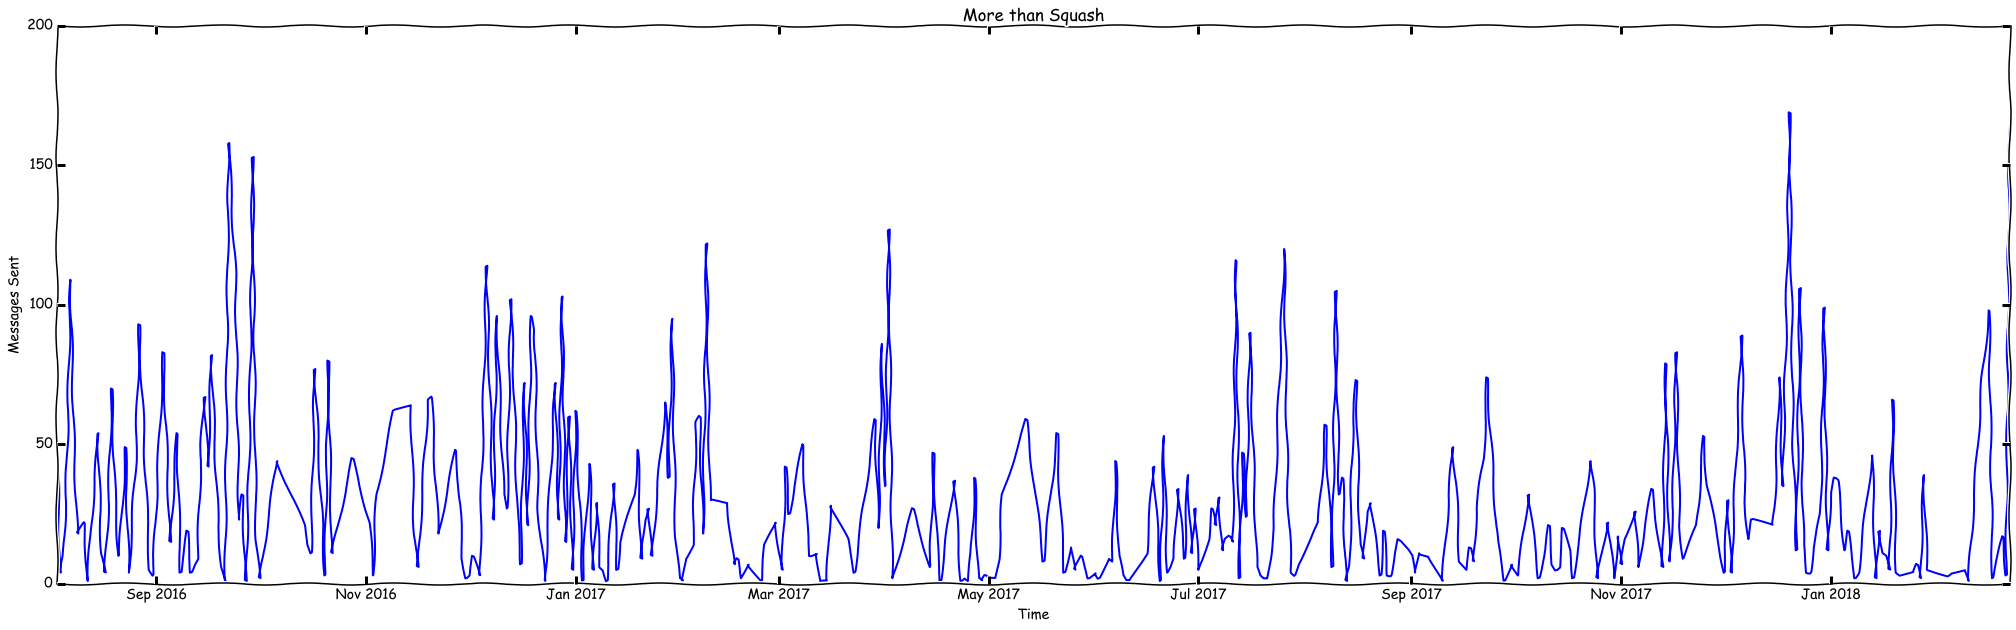

In [62]:
plt.figure(figsize=(35,10))
plt.xkcd()
plt.plot(nf['Date'], nf['Sender'])
plt.ylabel('Messages Sent')
plt.xlabel('Time')
plt.title('More than Squash')
plt.show

In [78]:
# TODO:
# Groupby to get number of messages per date
# Histogram